# Livestock Lifelines: Analyzing Trends to Combat Food Insecurity in the Philippines

**Members:**
- Balangeg, Kyle
- Cruz, Dwight Kenneth
- De Lara, Aaron Charles
- Gaano, Rex Allaire
- Ng, Alyza Paige

In [7]:
import warnings # To manage warnings.
import tabulate # To pretty-print tabular data.

import numpy as np # Used for working with arrays, matrices, and a range of mathematical operations.
import pandas as pd # Provides data structures such as DataFrame and Series.
import matplotlib.pyplot as plt # Creating various types of visualizations, like line plots, scatter plots, bar charts, etc.

warnings.simplefilter(action='ignore') # To ignore warnings that may arise during execution. 
# Helpful in making the code look not that complicated.

### Initial Update:
- Added Data Cleaning
- Added Feature Engineering

### To do list:
- Check the data cleaning part
- Check and add more feature engineering
- Data Exploration
- Visualizations

## Understanding the Dataset

The `2E4FINL0` dataset is utilized for this analysis.

### Dataset Description

The dataset records the livestock inventory in the Philippines, disaggregated by **animal type, farm type, region, province,** and **quarter** over the period from **1994 to 2022.**\
\
The inventory measures the actual number of animals present on farms, regardless of ownership, as of a specific reference date.

### Variables and Their Definitions

- **Animal Type:** Different kinds of poultry animals (e.g., chicken, swine, etc.).
- **Farm Type:** Whether the farm is a backyard or commercial farm.
- **Region and Province:** Geographical information on where the data was collected.
- **Quarter:** The reference quarter of the data (January, April, July, October).
- **Inventory (count):** The number of animals present (in heads).

### Purpose of the Data

The `2E4FINL0` dataset monitors the inventory levels of livestock across different regions and provinces in the Philippines. The dataset was obtained from the Philippine Statistics Authority (PSA) OpenSTAT website. Philippine Statistics Authority (PSA) is the government agency responsible for collecting and publishing this data, which is useful for planning in agriculture, economics, and food production. Hence, it provides insight into the distribution of livestock by farm type, geographical location, and time.

### Problem Statement

Food security remains an issue in the Philippines, with 44.7% of Filipinos experiencing food insecurity in 2023 (Author, Date). Livestock production, a critical component of the food supply chain, has a direct impact on the availability and affordability of meat and eggs, which are staple food sourced for Filipinos.

The analysis of livestock trends across different regions and farm types can provide insights into regional disparities in livestock production. Identifying regions that underperform or show declining trends in livestock numbers will help highlight areas where government intervention or infrastructure improvements are needed to mitigate the food insecurity for Filipinos.

### Objectives of the Analysis

Therefore, this analysis aims to:
1. Identify trends in livestock production across regions and provinces in the Philippines from 1994 to 2022.
2. Determine whether certain regions consistently have lower livestock inventory levels compared to others.
3. Assess the impact of farm types (backyard vs. commercial) on livestock production trends.
4. Provide recommendations for addressing regional disparities to improve Filipino food security.

## Part 1: Data Wrangling

### 1.1 Data Exploration

#### ➡️ Load the dataset into Pandas dataframe

In [8]:
df_livestock = pd.read_csv('2E4FINL0.csv', header=1)

# "header" specifies which row of the CSV file should be used as the column name.
# "header=1" means that the second row of the CSV file will be used as column headers.

#### ➡️ Inspect the data

In [9]:
df_livestock.head(10)

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
0,Carabao,Backyard,PHILIPPINES,2555492,..,2664806,..,2702325,..,2832240,...,2837583,..,2769604,2766991,2762309,2781425,2766009,..,..,..
1,Carabao,Backyard,National Capital Region (NCR),..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Carabao,Backyard,Cordillera Administrative Region (CAR),89882,..,97573,..,99245,..,115566,...,78747,..,77218,77605,78637,79207,78579,..,..,..
3,Carabao,Backyard,....Abra,24784,..,25952,..,26377,..,35461,...,16408,..,17475,18075,17996,18591,17800,..,..,..
4,Carabao,Backyard,....Apayao,..,..,..,..,..,..,..,...,17309,..,17856,17240,18175,18100,18045,..,..,..
5,Carabao,Backyard,....Benguet,7503,..,12105,..,15333,..,22250,...,11606,..,11427,11433,11445,11713,11546,..,..,..
6,Carabao,Backyard,....Ifugao,16626,..,17122,..,16802,..,17478,...,7649,..,5470,5270,5276,5280,5861,..,..,..
7,Carabao,Backyard,....Kalinga,27063,..,28844,..,27359,..,28431,...,20518,..,19585,20090,20170,19883,19657,..,..,..
8,Carabao,Backyard,....Mountain Province,13906,..,13550,..,13374,..,11946,...,5257,..,5405,5497,5575,5640,5670,..,..,..
9,Carabao,Backyard,Region I (Ilocos Region),155287,..,150434,..,161524,..,191648,...,178890,..,165745,160828,156611,153234,150936,..,..,..


In [13]:
df_livestock.shape
# 808 Rows and 123 Columns

(808, 123)

In [14]:
df_livestock.info()
# First column is Animal Type and the last column is 2023 01 Otober

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Columns: 123 entries, Animal Type to 2023 01 October
dtypes: object(123)
memory usage: 776.6+ KB


In [15]:
df_livestock.describe()

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
count,808,808,808,808,808,808,808,808,808,808,...,808,808,808,808,808,808,808,808,808,808
unique,4,2,101,590,162,618,171,609,170,615,...,677,193,629,619,616,616,609,1,1,1
top,Carabao,Backyard,PHILIPPINES,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,202,404,8,184,645,161,637,147,635,160,...,96,614,146,146,151,149,150,808,808,808


In [16]:
df_livestock.columns

Index(['Animal Type', 'Farm Type', 'Geolocation', '1994 01 January',
       '1994 01 April', '1994 01 July', '1994 01 October', '1995 01 January',
       '1995 01 April', '1995 01 July',
       ...
       '2021 01 July', '2021 01 October', '2022 01 January', '2022 01 April',
       '2022 01 July', '2022 01 October', '2023 01 January', '2023 01 April',
       '2023 01 July', '2023 01 October'],
      dtype='object', length=123)

In [21]:
# Finding Columns that are completely null.

df_livestock_with_null = df_livestock.copy() # Making a duplicate dataframe.

df_livestock_with_null.replace(['..', '', ' ', '**', '*'], np.nan, inplace=True)
# "np.nan" It is used to represent missing or undefined values in a dataset.
# "inplace=True" means the operation is performed directly on the original DataFrame (or copy of it) without returning a new object.
# Parameters (to be replaced, replace with, perform directly on the copy)

# Identifies columns where all the values are NaN (missing) in the df_livestock_with_null DataFrame.
null_columns = df_livestock_with_null.columns[df_livestock_with_null.isnull().all()]
print("The following are the null columns:") 
print("****************************************************")
print(null_columns)
print("****************************************************")

The following are the null columns:
****************************************************
Index(['2023 01 April', '2023 01 July', '2023 01 October'], dtype='object')
****************************************************


In [461]:
# Counting the number of Null Values Each Column

df_livestock_with_null.isnull().sum()

Animal Type          0
Farm Type            0
Geolocation          0
1994 01 January    184
1994 01 April      645
                  ... 
2022 01 October    162
2023 01 January    163
2023 01 April      808
2023 01 July       808
2023 01 October    808
Length: 123, dtype: int64

In [462]:
# Looking at the Dataset with null values included.

df_livestock_with_null.head(10)

,Animal Type,Farm Type,Geolocation,1994 01 January,1994 01 April,1994 01 July,1994 01 October,1995 01 January,1995 01 April,1995 01 July,...,2021 01 July,2021 01 October,2022 01 January,2022 01 April,2022 01 July,2022 01 October,2023 01 January,2023 01 April,2023 01 July,2023 01 October
0,Carabao,Backyard,PHILIPPINES,2555492,NaN,2664806,NaN,2702325,NaN,2832240,...,2837583,NaN,2769604,2766991,2762309,2781425,2766009,NaN,NaN,NaN
1,Carabao,Backyard,National Capital Region (NCR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carabao,Backyard,Cordillera Administrative Region (CAR),89882,NaN,97573,NaN,99245,NaN,115566,...,78747,NaN,77218,77605,78637,79207,78579,NaN,NaN,NaN
3,Carabao,Backyard,....Abra,24784,NaN,25952,NaN,26377,NaN,35461,...,16408,NaN,17475,18075,17996,18591,17800,NaN,NaN,NaN
4,Carabao,Backyard,....Apayao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17309,NaN,17856,17240,18175,18100,18045,NaN,NaN,NaN
5,Carabao,Backyard,....Benguet,7503,NaN,12105,NaN,15333,NaN,22250,...,11606,NaN,11427,11433,11445,11713,11546,NaN,NaN,NaN
6,Carabao,Backyard,....Ifugao,16626,NaN,17122,NaN,16802,NaN,17478,...,7649,NaN,5470,5270,5276,5280,5861,NaN,NaN,NaN
7,Carabao,Backyard,....Kalinga,27063,NaN,28844,NaN,27359,NaN,28431,...,20518,NaN,19585,20090,20170,19883,19657,NaN,NaN,NaN
8,Carabao,Backyard,....Mountain Province,13906,NaN,13550,NaN,13374,NaN,11946,...,5257,NaN,5405,5497,5575,5640,5670,NaN,NaN,NaN
9,Carabao,Backyard,Region I (Ilocos Region),155287,NaN,150434,NaN,161524,NaN,191648,...,178890,NaN,165745,160828,156611,153234,150936,NaN,NaN,NaN


In [463]:
# Checking the Data Type of each column.
df_livestock_with_null.dtypes

Animal Type         object
Farm Type           object
Geolocation         object
1994 01 January     object
1994 01 April       object
                    ...   
2022 01 October     object
2023 01 January     object
2023 01 April      float64
2023 01 July       float64
2023 01 October    float64
Length: 123, dtype: object

#### ➡️ Standardizing Data Types

Convert the columns `Animal Type`, `Farm Type`, and `Geolocation` to categorical from object data type.

In [464]:
df_livestock['Animal Type'] = df_livestock['Animal Type'].astype('category')
df_livestock['Farm Type'] = df_livestock['Farm Type'].astype('category')
df_livestock['Geolocation'] = df_livestock['Geolocation'].astype('category')

#### ➡️ Create a data dictionary

In [465]:
def create_data_dict(df):
    descriptions = {
        'Animal Type': 'Type of animal present in the farm',
        'Farm Type': 'Type of farm where the animals are (e.g., backyard, commercial)',
        'Geolocation': 'Region and province in the Philippines'
    }
    
    date_columns = [col for col in df.columns if col.startswith(('19', '20'))]
    date_descriptions = {col: 'Number of animals present in the farm as of specific reference date' for col in date_columns}

    descriptions.update(date_descriptions)
    
    data_dict = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': [descriptions.get(col, 'No description available') for col in df.columns]
    })
    
    return data_dict

data_dict_fao = create_data_dict(df_livestock)
print(data_dict_fao.to_markdown(index=False))


| Column Name     | Data Type   | Description                                                         |
|:----------------|:------------|:--------------------------------------------------------------------|
| Animal Type     | category    | Type of animal present in the farm                                  |
| Farm Type       | category    | Type of farm where the animals are (e.g., backyard, commercial)     |
| Geolocation     | category    | Region and province in the Philippines                              |
| 1994 01 January | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 April   | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 July    | object      | Number of animals present in the farm as of specific reference date |
| 1994 01 October | object      | Number of animals present in the farm as of specific reference date |
| 1995 01 January | object      | Number of animals present in t

In [466]:
print("Footnotes of the dataset:")
print("""
    .. Data not applicable
    01 Jan 2023 - Preliminary
    01 Jan 2022 - Revised for Cattle
    01 Apr 2022 - Revised for Carabao
    * - Zamboanga City included in Zamboanga del Sur.
    ** - Davao City included in Davao del Sur.
    Note - Ending Inventory of 2022 are based on the new design of BLPS and new survey frame for CLPS.
    """
     )

Footnotes of the dataset:

    .. Data not applicable
    01 Jan 2023 - Preliminary
    01 Jan 2022 - Revised for Cattle
    01 Apr 2022 - Revised for Carabao
    * - Zamboanga City included in Zamboanga del Sur.
    ** - Davao City included in Davao del Sur.
    Note - Ending Inventory of 2022 are based on the new design of BLPS and new survey frame for CLPS.
    


### 1.2 Data Cleaning

#### ➡️ Handle missing values

In [467]:
# Extended replacement logic - to handle empty strings/whitespace. -k
df_livestock.replace(['..', '', ' '], np.nan, inplace=True)

In [468]:
df_livestock.dropna(axis=1, how='all', inplace=True)

#### ➡️ Handle duplicate rows

In [469]:
df_livestock.duplicated().sum()

0

#### ➡️ Handle invalid data

In [470]:
df_livestock.replace({'*': 0, '**': 0}, inplace=True)

#### ➡️ Convert Data Types

In [471]:
date_columns = df_livestock.columns[3:]
df_livestock[date_columns] = df_livestock[date_columns].apply(pd.to_numeric, errors='coerce')

df_livestock.dtypes

Animal Type        category
Farm Type          category
Geolocation        category
1994 01 January     float64
1994 01 April       float64
                     ...   
2022 01 January     float64
2022 01 April       float64
2022 01 July        float64
2022 01 October     float64
2023 01 January     float64
Length: 120, dtype: object

In [472]:
df_livestock.dtypes

Animal Type        category
Farm Type          category
Geolocation        category
1994 01 January     float64
1994 01 April       float64
                     ...   
2022 01 January     float64
2022 01 April       float64
2022 01 July        float64
2022 01 October     float64
2023 01 January     float64
Length: 120, dtype: object

#### ➡️ Standardizing Column Names

In [473]:
df_livestock.columns = df_livestock.columns.str.upper().str.replace(' ', '_')

In [474]:
date_columns = df_livestock.columns[3:]

In [475]:
df_livestock.head(0) # 120 columns

,ANIMAL_TYPE,FARM_TYPE,GEOLOCATION,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,...,2020_01_OCTOBER,2021_01_JANUARY,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY


#### ➡️ Handling Date Columns

**Logic:**
1. For each column in df_livestock.columns, check if it starts with '19' or '20'. If it does, add it to the date_columns list.
2. For all columns in the date_columns list, attempt to convert the values in these columns to a numeric (int/float) data type. If there are non-numeric or missing values, replace with NaN.

In [476]:
date_columns = [col for col in df_livestock.columns if col.startswith(('19', '20'))]
df_livestock[date_columns] = df_livestock[date_columns].apply(pd.to_numeric, errors='coerce')

### 1.3 Feature Engineering

#### ➡️ Merge City Data into Province Data

In [477]:
def merge_city_to_province(df, province_name, city_name):
    if province_name in df['GEOLOCATION'].values and city_name in df['GEOLOCATION'].values:
        row_city = df[df['GEOLOCATION'] == city_name]
        df.loc[df['GEOLOCATION'] == province_name, df.columns[3:]] += row_city.iloc[0, 3:]
        df = df[df['GEOLOCATION'] != city_name]
    return df

#### ➡️ Merge City of Zamboanga with Zamboanga del Sur, and City of Davao with Davao del Sur

In [478]:
df_livestock = merge_city_to_province(df_livestock, '....Zamboanga del Sur', '......City of Zamboanga')
df_livestock = merge_city_to_province(df_livestock, '....Davao del Sur', '......City of Davao')

#### ➡️ Split GEOLOCATION into REGION and PROVINCE

In [479]:
df_livestock['REGION'] = df_livestock['GEOLOCATION'].where(~df_livestock['GEOLOCATION'].str.startswith('....')).ffill()
df_livestock['PROVINCE'] = df_livestock['GEOLOCATION'].where(df_livestock['GEOLOCATION'].str.startswith('....'))
df_livestock['PROVINCE'] = df_livestock['PROVINCE'].str.replace('....', '', regex=False)
df_livestock['REGION'] = df_livestock['REGION'].str.replace('..', '', regex=False)
df_livestock.drop(columns=['GEOLOCATION'], inplace=True)

In [480]:
df_livestock.head(0) # 121 columns

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE


#### ➡️ Fixing Data Names

In [481]:
df_livestock['REGION'].unique() # initial REGION names

array(['PHILIPPINES', 'National Capital Region (NCR)',
       'Cordillera Administrative Region (CAR)',
       'Region I (Ilocos Region)', 'Region II (Cagayan Valley)',
       'Region III (Central Luzon)', 'Region IVA (CALABARZON)',
       'MIMAROPA Region', 'Region V (Bicol Region)',
       'Region VI (Western Visayas)', 'Region VII (Central Visayas)',
       'Region VIII (Eastern Visayas)', 'Region IX (Zamboanga Peninsula)',
       'Region X (Northern Mindanao)', 'Region XI (Davao Region)',
       'Region XII (SOCCSKSARGEN)', 'Region XIII (Caraga)',
       'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)'],
      dtype=object)

In [482]:
df_livestock['PROVINCE'].unique() # initial PROVINCE names

array([nan, 'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
       'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna',
       'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay',
       'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate',
       'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
       'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar',
       'Samar', 'Southern Leyte', 'Zamboanga del Norte',
       'Zamboanga del Sur', 'Zamboanga Sibugay', 'Bukidnon', 'Camiguin',
       'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental',
       'Davao de Oro (Compostela Valley)', 'Davao del Norte',
   

In [483]:
region_newName = {
    'PHILIPPINES': 'Regions_Total',
    'National Capital Region (NCR)': 'NCR',
    'Cordillera Administrative Region (CAR)': 'CAR',
    'Region I (Ilocos Region)': 'Region_I',
    'Region II (Cagayan Valley)': 'Region_II',
    'Region III (Central Luzon)': 'Region_III',
    'Region IVA (CALABARZON)': 'Region_IV',
    'MIMAROPA Region': 'MIMAROPA',
    'Region V (Bicol Region)': 'Region_V',
    'Region VI (Western Visayas)': 'Region_VI',
    'Region VII (Central Visayas)': 'Region_VII',
    'Region VIII (Eastern Visayas)': 'Region_VIII',
    'Region IX (Zamboanga Peninsula)': 'Region_IX',
    'Region X (Northern Mindanao)': 'Region_X',
    'Region XI (Davao Region)': 'Region_XI',
    'Region XII (SOCCSKSARGEN)': 'Region_XII',
    'Region XIII (Caraga)': 'Region_XIII',
    'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)': 'BARMM'
}

In [484]:
df_livestock['REGION'] = df_livestock['REGION'].replace(region_newName)

In [485]:
df_livestock['PROVINCE'] = df_livestock['PROVINCE'].fillna('N/A')

In [486]:
df_livestock['REGION'].unique() # new REGION names

array(['Regions_Total', 'NCR', 'CAR', 'Region_I', 'Region_II',
       'Region_III', 'Region_IV', 'MIMAROPA', 'Region_V', 'Region_VI',
       'Region_VII', 'Region_VIII', 'Region_IX', 'Region_X', 'Region_XI',
       'Region_XII', 'Region_XIII', 'BARMM'], dtype=object)

In [487]:
df_livestock['PROVINCE'].unique() # new PROVINCE names

array(['N/A', 'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'Ilocos Norte', 'Ilocos Sur', 'La Union',
       'Pangasinan', 'Batanes', 'Cagayan', 'Isabela', 'Nueva Vizcaya',
       'Quirino', 'Aurora', 'Bataan', 'Bulacan', 'Nueva Ecija',
       'Pampanga', 'Tarlac', 'Zambales', 'Batangas', 'Cavite', 'Laguna',
       'Quezon', 'Rizal', 'Marinduque', 'Occidental Mindoro',
       'Oriental Mindoro', 'Palawan', 'Romblon', 'Albay',
       'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate',
       'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo',
       'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Samar',
       'Samar', 'Southern Leyte', 'Zamboanga del Norte',
       'Zamboanga del Sur', 'Zamboanga Sibugay', 'Bukidnon', 'Camiguin',
       'Lanao del Norte', 'Misamis Occidental', 'Misamis Oriental',
       'Davao de Oro (Compostela Valley)', 'Davao del Norte',
 

#### ➡️ Drop 'Regions_Total' Column in REGION

Including `Regions_Total` would distort the comparisons — since it's not a specific region but rather an aggregate (sum).
> `Regions_Total` was created in region_newName dictionary

In [488]:
df_livestock = df_livestock[(df_livestock['REGION'] != 'Regions_Total')]

In [489]:
df_livestock = df_livestock[(df_livestock['REGION'] == 'NCR') | (df_livestock['PROVINCE'] != 'N/A')]

#### ➡️ Filling Up Missing Values

Rows where PROVINCE is 'N/A' generally correspond to regions like NCR, which don’t have provinces under them. Forward-filling such rows would carry values from unrelated provinces, leading to incorrect data for regions like NCR.

In [490]:
# 1. Forward Fill for all date columns
df_livestock[date_columns] = df_livestock[date_columns].ffill(axis=1)

# 2. Replace remaining NaN with -1, indicating non-existent livestock data
df_livestock[date_columns] = df_livestock[date_columns].fillna(-1)

Using forward-fill followed by replacing remaining NaN with -1 is reasonable.
> **Forward-fill** manages continuous periods where livestock counts are consistent.\
> **-1 for remaining NaN** indicates livestock that might not have existed, which can be useful for analysis or visualization. For example, use -1 to visually indicate missing data differently from valid zero counts.

In [491]:
df_livestock.head(5)

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE
1,Carabao,Backyard,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NCR,N/A
3,Carabao,Backyard,24784.0,24784.0,25952.0,25952.0,26377.0,26377.0,35461.0,35461.0,...,15701.0,16408.0,16408.0,17475.0,18075.0,17996.0,18591.0,17800.0,CAR,Abra
4,Carabao,Backyard,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,18290.0,17309.0,17309.0,17856.0,17240.0,18175.0,18100.0,18045.0,CAR,Apayao
5,Carabao,Backyard,7503.0,7503.0,12105.0,12105.0,15333.0,15333.0,22250.0,22250.0,...,11433.0,11606.0,11606.0,11427.0,11433.0,11445.0,11713.0,11546.0,CAR,Benguet
6,Carabao,Backyard,16626.0,16626.0,17122.0,17122.0,16802.0,16802.0,17478.0,17478.0,...,7725.0,7649.0,7649.0,5470.0,5270.0,5276.0,5280.0,5861.0,CAR,Ifugao


Ideally, the -1 values should only appear before the first valid livestock count in each series of data, not between two valid values.

In [492]:
negative_inbet = df_livestock[
    (df_livestock['1994_01_JANUARY'] > 0) & 
    (df_livestock[date_columns[1:]].isin([-1]).any(axis=1))
]

negative_inbet.head(3) # 94 total|

,ANIMAL_TYPE,FARM_TYPE,1994_01_JANUARY,1994_01_APRIL,1994_01_JULY,1994_01_OCTOBER,1995_01_JANUARY,1995_01_APRIL,1995_01_JULY,1995_01_OCTOBER,...,2021_01_APRIL,2021_01_JULY,2021_01_OCTOBER,2022_01_JANUARY,2022_01_APRIL,2022_01_JULY,2022_01_OCTOBER,2023_01_JANUARY,REGION,PROVINCE


However, this is not the case, given the row shown above. There are instances where in there's **-1** between two valid values.
> This _could_ be a problem, since having **-1** values after the first valid livestock could affect trend analysis — can skew results.

Some possible solutions:
> Leave -1 Values if the group will like to preserve this absence of data in between periods.\
> Forward-fill again for these specific rows to fill in the gaps after the valid first value.

If the group decides to forward-fill again, use the following code snippet. Otherwise, please discard.

In [493]:
#df_livestock[date_columns] = negative_inbetween[date_columns].ffill(axis=1)

#### ➡️ Region with N/A as Province (!)

NCR is the only region without a province, therefore we can leave province for NCR as N/A.
> It is also an option to replace N/A with NCR for clarity — the which the cell below does.

In [494]:
df_livestock.loc[(df_livestock['REGION'] == 'NCR') & (df_livestock['PROVINCE'] == 'N/A'), 'PROVINCE'] = 'NCR'

**Concern:** There are regions that have N/A as their province. I'm not yet sure why.

#### ➡️ Melt Date Columns into One Single Column With Their Corresponding Values

In [495]:
# Reshape data (melt) to long format with QUARTER and LIVESTOCK_COUNT
melted_livestock = pd.melt(df_livestock, id_vars=['ANIMAL_TYPE', 'FARM_TYPE', 'PROVINCE', 'REGION'], 
                           value_vars=date_columns, var_name='QUARTER', value_name='LIVESTOCK_COUNT')

In [496]:
melted_livestock.head()

,ANIMAL_TYPE,FARM_TYPE,PROVINCE,REGION,QUARTER,LIVESTOCK_COUNT
0,Carabao,Backyard,NCR,NCR,1994_01_JANUARY,-1.0
1,Carabao,Backyard,Abra,CAR,1994_01_JANUARY,24784.0
2,Carabao,Backyard,Apayao,CAR,1994_01_JANUARY,-1.0
3,Carabao,Backyard,Benguet,CAR,1994_01_JANUARY,7503.0
4,Carabao,Backyard,Ifugao,CAR,1994_01_JANUARY,16626.0


In [497]:
# Turning these columns into 'category' datatype
melted_livestock['PROVINCE'] = melted_livestock['PROVINCE'].astype('category')
melted_livestock['REGION'] = melted_livestock['REGION'].astype('category')
melted_livestock['QUARTER'] = melted_livestock['QUARTER'].astype('category')

#### ➡️ New Data Dictionary for melted_livestock Dataframe

In [498]:
def new_dd(df):
    descriptions = {
        'ANIMAL_TYPE': 'Type of animal present in the farm.',
        'FARM_TYPE': 'Type of farm where the animals are.',
        'PROVINCE': 'Specific province in the Philippines',
        'REGION': 'Region in the Philippines',
        'QUARTER': 'Quarter of the year when the data was recorded.',
        'LIVESTOCK_COUNT': 'Number of animals present in the farm as of the specific quarter'
    }
    
    # Create the data dictionary DataFrame
    data_dict = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Description': [descriptions.get(col, 'No description available') for col in df.columns]
    })
    
    return data_dict

In [499]:
new_dd = new_dd(melted_livestock)

In [500]:
print(new_dd.to_markdown(index=False))

| Column Name     | Data Type   | Description                                                      |
|:----------------|:------------|:-----------------------------------------------------------------|
| ANIMAL_TYPE     | category    | Type of animal present in the farm.                              |
| FARM_TYPE       | category    | Type of farm where the animals are.                              |
| PROVINCE        | category    | Specific province in the Philippines                             |
| REGION          | category    | Region in the Philippines                                        |
| QUARTER         | category    | Quarter of the year when the data was recorded.                  |
| LIVESTOCK_COUNT | float64     | Number of animals present in the farm as of the specific quarter |


#### ➡️ Save Cleaned Data

Create a new CSV file with the melted and cleaned `2E4FINL0` data.

In [501]:
# melted_livestock.to_csv('2E4FINL0_cleaned.csv', index=False)

### 1.4 Visualization

#### ➡️ Visualizing through Bar Graph

In [502]:
# Make a copy of the melted DataFrame
carabao_backyard = melted_livestock.copy()

# Filter for specific Animal Type and Farm Type
filtered_livestock = carabao_backyard[
    (carabao_backyard['ANIMAL_TYPE'] == 'Carabao') &
    (carabao_backyard['FARM_TYPE'] == 'Backyard')
]

# Group by REGION and get the the sum of LIVESTOCK_COUNT
carabao_backyard = filtered_livestock.groupby('REGION', as_index=False).agg(
    LIVESTOCK_COUNT=('LIVESTOCK_COUNT', 'sum')  
)

# Include the Animal Type and Farm Type columns in the carabao_backyard grouped dataset.
carabao_backyard['ANIMAL_TYPE'] = 'Carabao'
carabao_backyard['FARM_TYPE'] = 'Backyard'

In [503]:
# Showing all Regions
carabao_backyard.head(30)

,REGION,LIVESTOCK_COUNT,ANIMAL_TYPE,FARM_TYPE
0,BARMM,17250187.0,Carabao,Backyard
1,CAR,10674878.0,Carabao,Backyard
2,MIMAROPA,16479977.0,Carabao,Backyard
3,NCR,-117.0,Carabao,Backyard
4,Region_I,22437748.0,Carabao,Backyard
5,Region_II,33303110.0,Carabao,Backyard
6,Region_III,24220385.0,Carabao,Backyard
7,Region_IV,17740369.0,Carabao,Backyard
8,Region_IX,20579051.0,Carabao,Backyard
9,Region_V,31680519.0,Carabao,Backyard


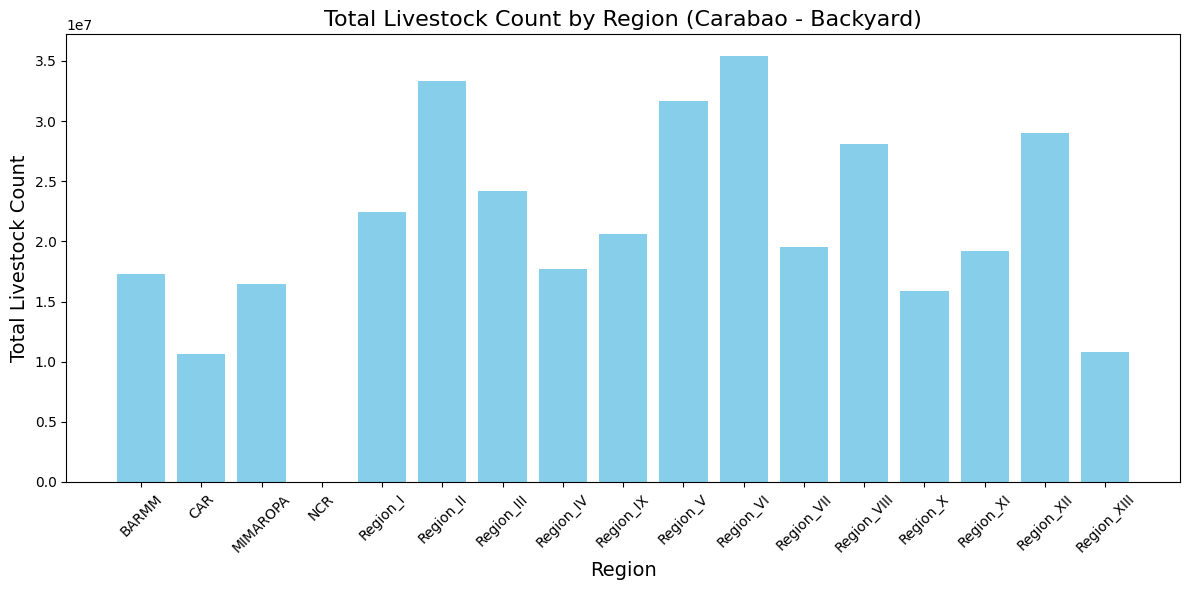

In [504]:

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(carabao_backyard['REGION'], carabao_backyard['LIVESTOCK_COUNT'], color='skyblue')

plt.title('Total Livestock Count by Region (Carabao - Backyard)', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Livestock Count', fontsize=14)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

#### ➡️ Visualizing through Line Graph

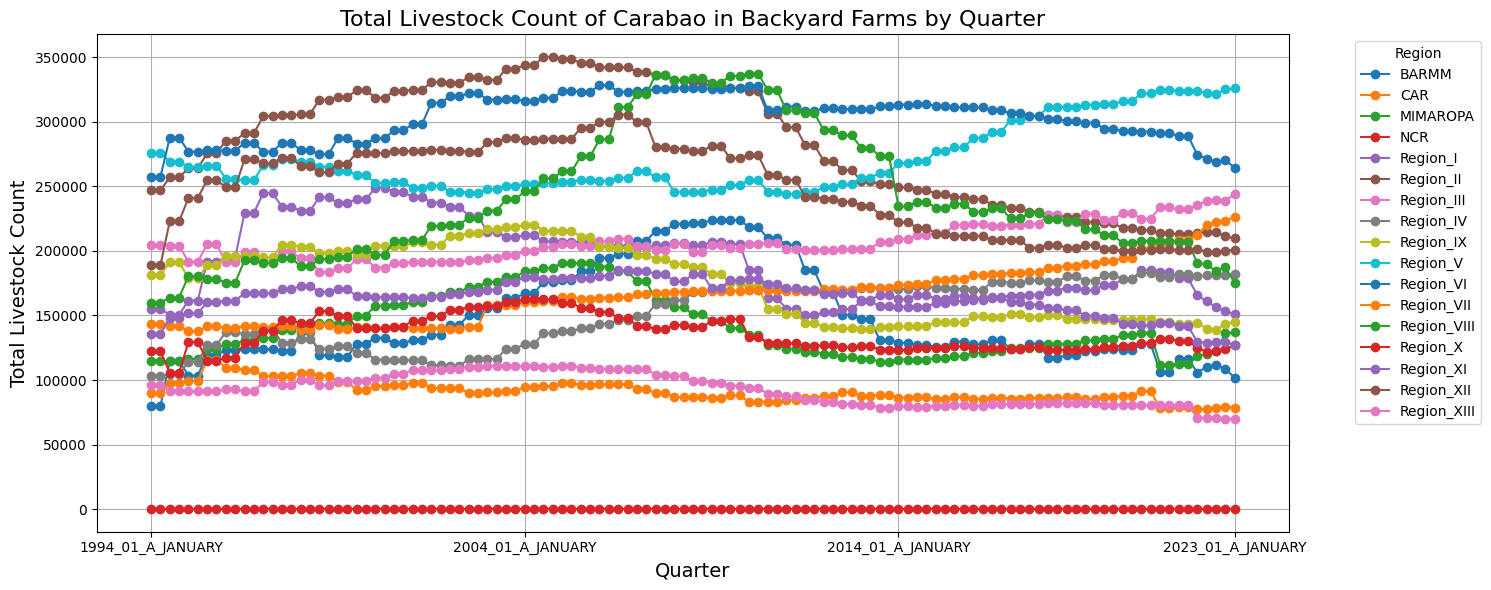

In [518]:
carabao_backyard = melted_livestock.copy()

# Putting an additional letter before each month to properly plot each Quarter points.
carabao_backyard['QUARTER'] = carabao_backyard['QUARTER'].str.replace(
    r'(?P<year_month>.*?)(JANUARY|APRIL|JULY|OCTOBER)', 
    lambda m: f"{m.group('year_month')}{'A_' if m.group(2) == 'JANUARY' else 'B_' if m.group(2) == 'APRIL' else 'C_' if m.group(2) == 'JULY' else 'D_'}{m.group(2)}",
    regex=True
)

# Filter the DataFrame for Carabao and Backyard
filtered_livestock = carabao_backyard[(carabao_backyard['ANIMAL_TYPE'] == 'Carabao') & 
                                       (carabao_backyard['FARM_TYPE'] == 'Backyard')]

# Group by QUARTER and REGION, summing up LIVESTOCK_COUNT
grouped_data = filtered_livestock.groupby(['QUARTER', 'REGION'])['LIVESTOCK_COUNT'].sum().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='QUARTER', columns='REGION', values='LIVESTOCK_COUNT').fillna(0)

# Creating the line graph
plt.figure(figsize=(15, 6))
for region in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[region], marker='o', label=region)
plt.title('Total Livestock Count of Carabao in Backyard Farms by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Livestock Count', fontsize=14)
visible_quarters = ['1994_01_A_JANUARY', '2004_01_A_JANUARY', '2014_01_A_JANUARY', '2023_01_A_JANUARY']
plt.xticks(ticks=[pivot_data.index.get_loc(q) for q in visible_quarters if q in pivot_data.index], 
           labels=visible_quarters)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
carabao_commercial = melted_livestock.copy()

# Putting an additional letter before each month to properly plot each Quarter points.
carabao_backyard['QUARTER'] = carabao_backyard['QUARTER'].str.replace(
    r'(?P<year_month>.*?)(JANUARY|APRIL|JULY|OCTOBER)', 
    lambda m: f"{m.group('year_month')}{'A_' if m.group(2) == 'JANUARY' else 'B_' if m.group(2) == 'APRIL' else 'C_' if m.group(2) == 'JULY' else 'D_'}{m.group(2)}",
    regex=True
)

# Filter the DataFrame for Carabao and Backyard
filtered_livestock = carabao_backyard[(carabao_backyard['ANIMAL_TYPE'] == 'Carabao') & 
                                       (carabao_backyard['FARM_TYPE'] == 'Backyard')]

# Group by QUARTER and REGION, summing up LIVESTOCK_COUNT
grouped_data = filtered_livestock.groupby(['QUARTER', 'REGION'])['LIVESTOCK_COUNT'].sum().reset_index()

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='QUARTER', columns='REGION', values='LIVESTOCK_COUNT').fillna(0)

# Creating the line graph
plt.figure(figsize=(15, 6))
for region in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[region], marker='o', label=region)
plt.title('Total Livestock Count of Carabao in Backyard Farms by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Livestock Count', fontsize=14)
visible_quarters = ['1994_01_A_JANUARY', '2004_01_A_JANUARY', '2014_01_A_JANUARY', '2023_01_A_JANUARY']
plt.xticks(ticks=[pivot_data.index.get_loc(q) for q in visible_quarters if q in pivot_data.index], 
           labels=visible_quarters)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.grid()

plt.tight_layout()
plt.show()

#### ➡️ Visualizing through Box Plot

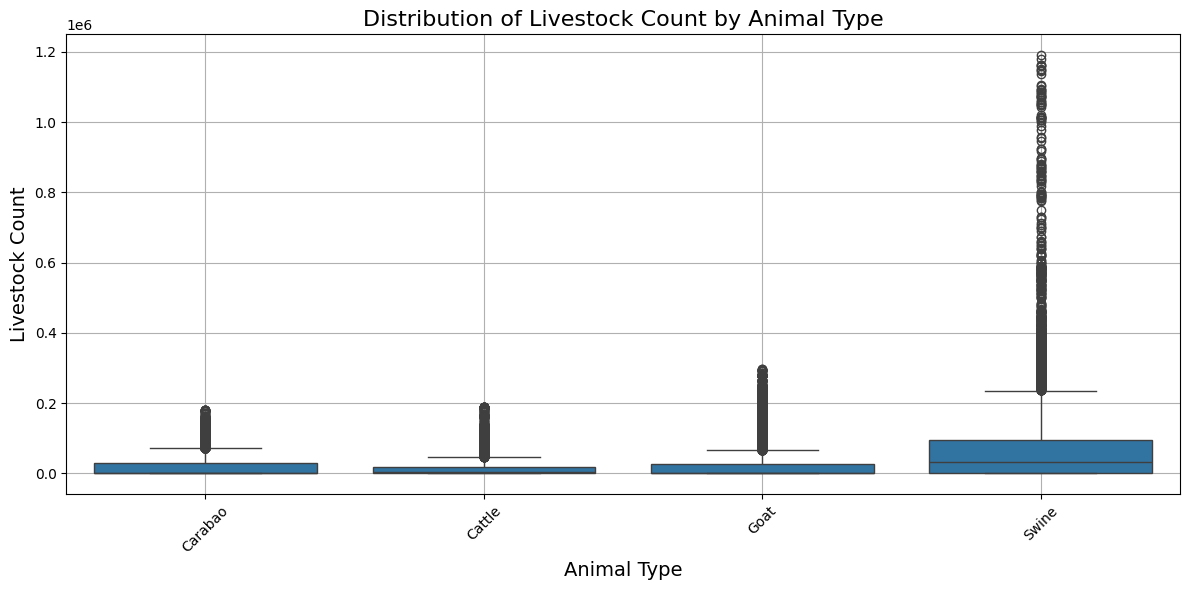

In [526]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='ANIMAL_TYPE', y='LIVESTOCK_COUNT', data=melted_livestock)

plt.title('Distribution of Livestock Count by Animal Type', fontsize=16)
plt.xlabel('Animal Type', fontsize=14)
plt.ylabel('Livestock Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()



### 1.5 Insights